In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(302, 14)

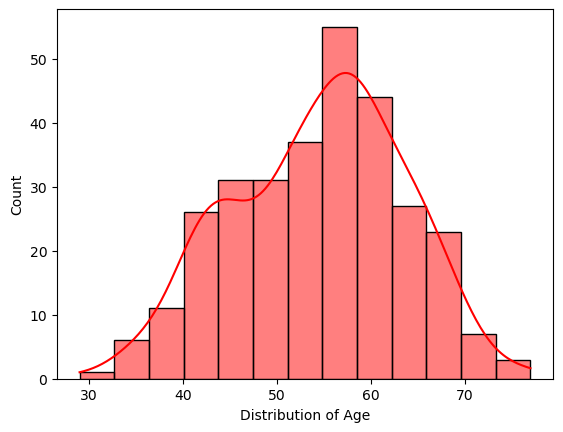


 54.420529801324506

 9.047969746247464


In [10]:
fig, ax = plt.subplots()
sns.histplot(data=df, kde=True, x='age', color='r', ax=ax)
ax.set(xlabel='Distribution of Age')
plt.show()

print('\n', df['age'].mean())
print('\n', df['age'].std())

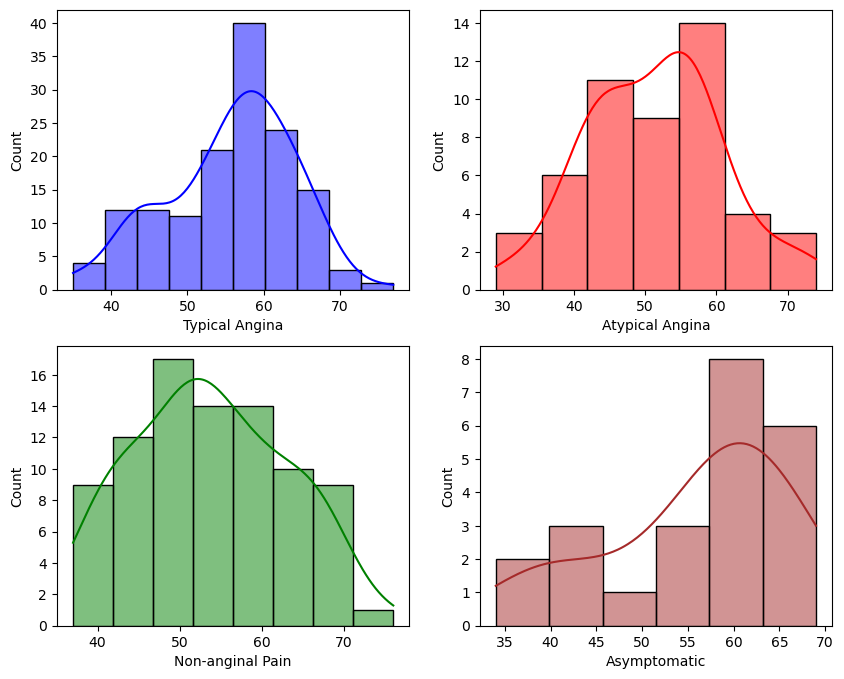

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df[df['cp'] == 0], kde=True, x='age', ax=axs[0, 0], color='blue')
sns.histplot(data=df[df['cp'] == 1], kde=True, x='age', ax=axs[0, 1], color='red')
sns.histplot(data=df[df['cp'] == 2], kde=True, x='age', ax=axs[1, 0], color='green')
sns.histplot(data=df[df['cp'] == 3], kde=True, x='age', ax=axs[1, 1], color='brown')

axs[0, 0].set(xlabel="Typical Angina")
axs[0, 1].set(xlabel="Atypical Angina")
axs[1, 0].set(xlabel="Non-anginal Pain")
axs[1, 1].set(xlabel="Asymptomatic")

plt.show()

In [12]:
print("\nAverage cholestrol level in mg/dl for Males: ", df[df['sex']==0]['chol'].mean())
print("Average cholestrol level in mg/dl for Females: ", df[df['sex']==1]['chol'].mean())


Average cholestrol level in mg/dl for Males:  261.3020833333333
Average cholestrol level in mg/dl for Females:  239.60194174757282


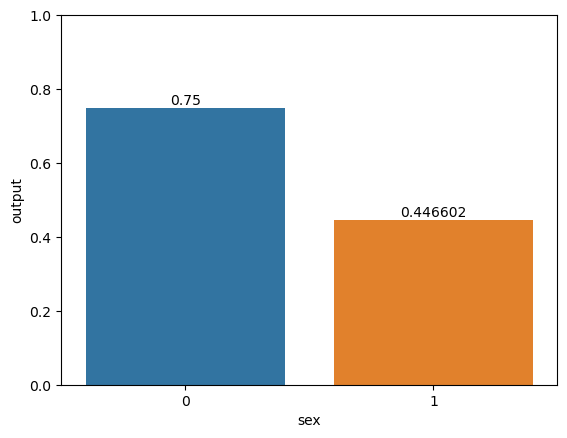

In [13]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='sex', y='output', estimator=np.mean, ci=None, ax=ax)
ax.bar_label(ax.containers[0])
ax.set_ylim((0, 1))
plt.show()

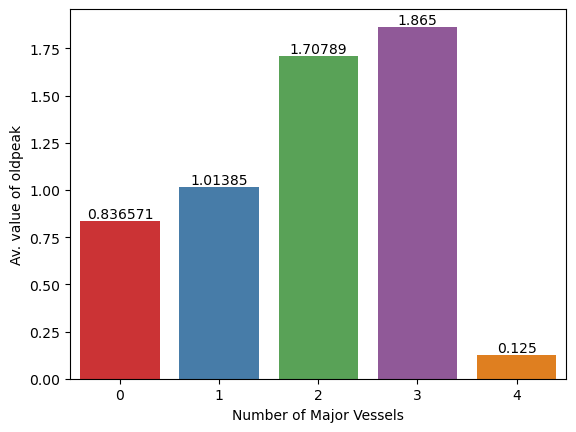

In [14]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='caa', y='oldpeak', estimator=np.mean, palette='Set1', ax=ax, ci=None)
ax.bar_label(ax.containers[0])
ax.set(ylabel="Av. value of oldpeak")
ax.set(xlabel="Number of Major Vessels")
plt.show()

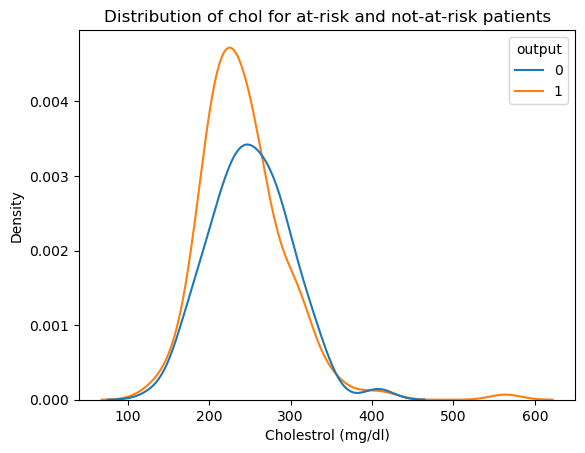

In [15]:
fig, ax = plt.subplots()
sns.kdeplot(data=df, x='chol', hue='output', ax=ax)
ax.set_title("Distribution of chol for at-risk and not-at-risk patients")
ax.set_xlabel("Cholestrol (mg/dl)")
plt.show()

In [16]:
X = df.drop('output', axis=1)
y = df['output']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
X_train[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']] = sc.fit_transform(X_train[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']])


In [20]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
59,0.289062,0,0,-0.192086,1.222784,0,0,0.405122,0,-0.889676,2,1,2
247,1.267182,1,1,1.590543,0.035438,0,1,-1.364273,1,-0.889676,1,3,1
289,0.071702,0,0,-0.192086,-0.818618,0,2,-0.910582,1,0.771788,1,1,3
288,0.289062,1,0,-1.194814,1.889363,0,1,-0.320784,1,1.602520,1,1,3
64,0.397742,1,2,0.476400,-0.693634,1,0,0.677336,0,-0.889676,2,0,2


In [21]:
X_test[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']] = sc.transform(X_test[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']])

In [22]:
X_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
179,0.289062,1,0,1.033472,0.660357,0,0,-1.727226,1,-0.391237,1,1,1
197,1.375862,1,0,-0.359207,0.202083,1,1,0.586598,0,-0.723530,1,2,3
285,-0.906419,1,0,0.476400,1.389429,0,1,-1.364273,1,0.605642,1,2,3
194,0.615102,1,2,0.476400,-1.235230,0,0,0.223645,0,1.602520,1,0,2
188,-0.471698,1,2,0.476400,-0.235360,0,1,0.586598,0,-0.391237,1,1,3


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=5, min_samples_split=5, random_state=42)

In [25]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [26]:
model_rf.score(X_test, y_test)

0.8032786885245902

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))

0.8971861471861472


In [65]:
importance = pd.concat([pd.Series(X_train.columns), 
                              pd.Series(model_rf.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by='importance', ascending=False)
importance

,feature,importance
2,cp,0.205461
12,thall,0.135782
9,oldpeak,0.120087
7,thalachh,0.111328
11,caa,0.106586
8,exng,0.089094
0,age,0.056096
10,slp,0.055459
4,chol,0.053929
3,trtbps,0.030888


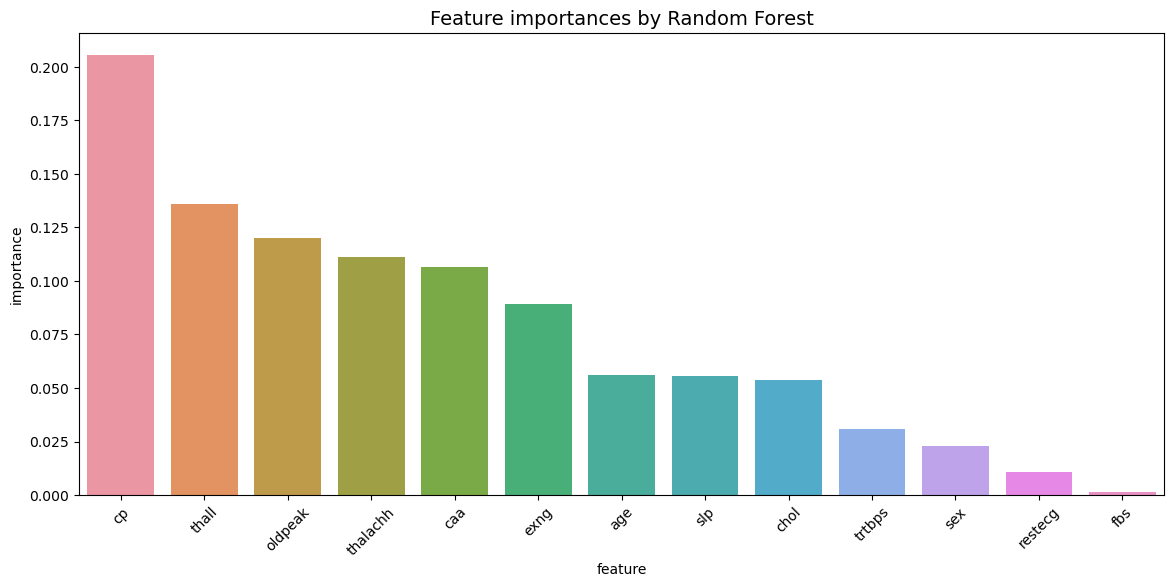

In [67]:
plt.figure(figsize=(14,6))
sns.barplot(data=importance, x='feature', y='importance')
plt.xticks(rotation=45)
plt.title('Feature importances by Random Forest', fontsize=14)
plt.show()

In [42]:
y_prob = model_rf.predict_proba(X_test)[:, 1]

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))

0.8971861471861472


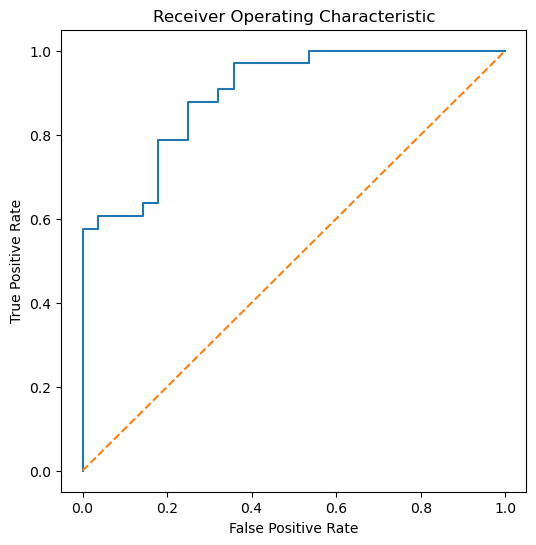

In [46]:
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()